**Prediction using Decision Tree**

ABHISHEK ZUNE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.Species.value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
iris['Species_class']=np.where(iris.Species=='Iris-virginica',1,np.where(iris.Species=='Iris-versicolor',2,3))

In [7]:
iris.Species_class.value_counts()


3    50
2    50
1    50
Name: Species_class, dtype: int64

In [8]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [9]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


**Model Preparation**


In [10]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( iris[cols],
                                                  iris['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

**Model Building**

In [11]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
              

In [13]:
tree.best_score_


0.9583333333333334

In [14]:
tree.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
tree.best_params_


{'max_depth': 4, 'max_features': 4}

In [16]:
train_pred = tree.predict(train_X)


In [17]:
test_pred = tree.predict(test_X)


In [18]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))


              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00        13

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [19]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [21]:
tree_test_pred.sample( n = 10 )


,actual,predicted
112,1,1
133,1,2
13,3,3
127,1,1
36,3,3
33,3,3
87,2,2
59,2,2
20,3,3
4,3,3


In [22]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )


0.9333333333333333

Text(0.5, 15.0, 'Predicted label')

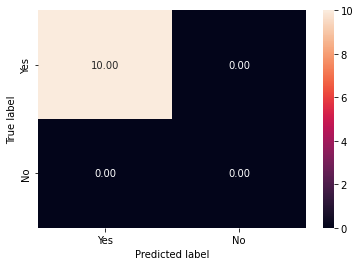

In [23]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

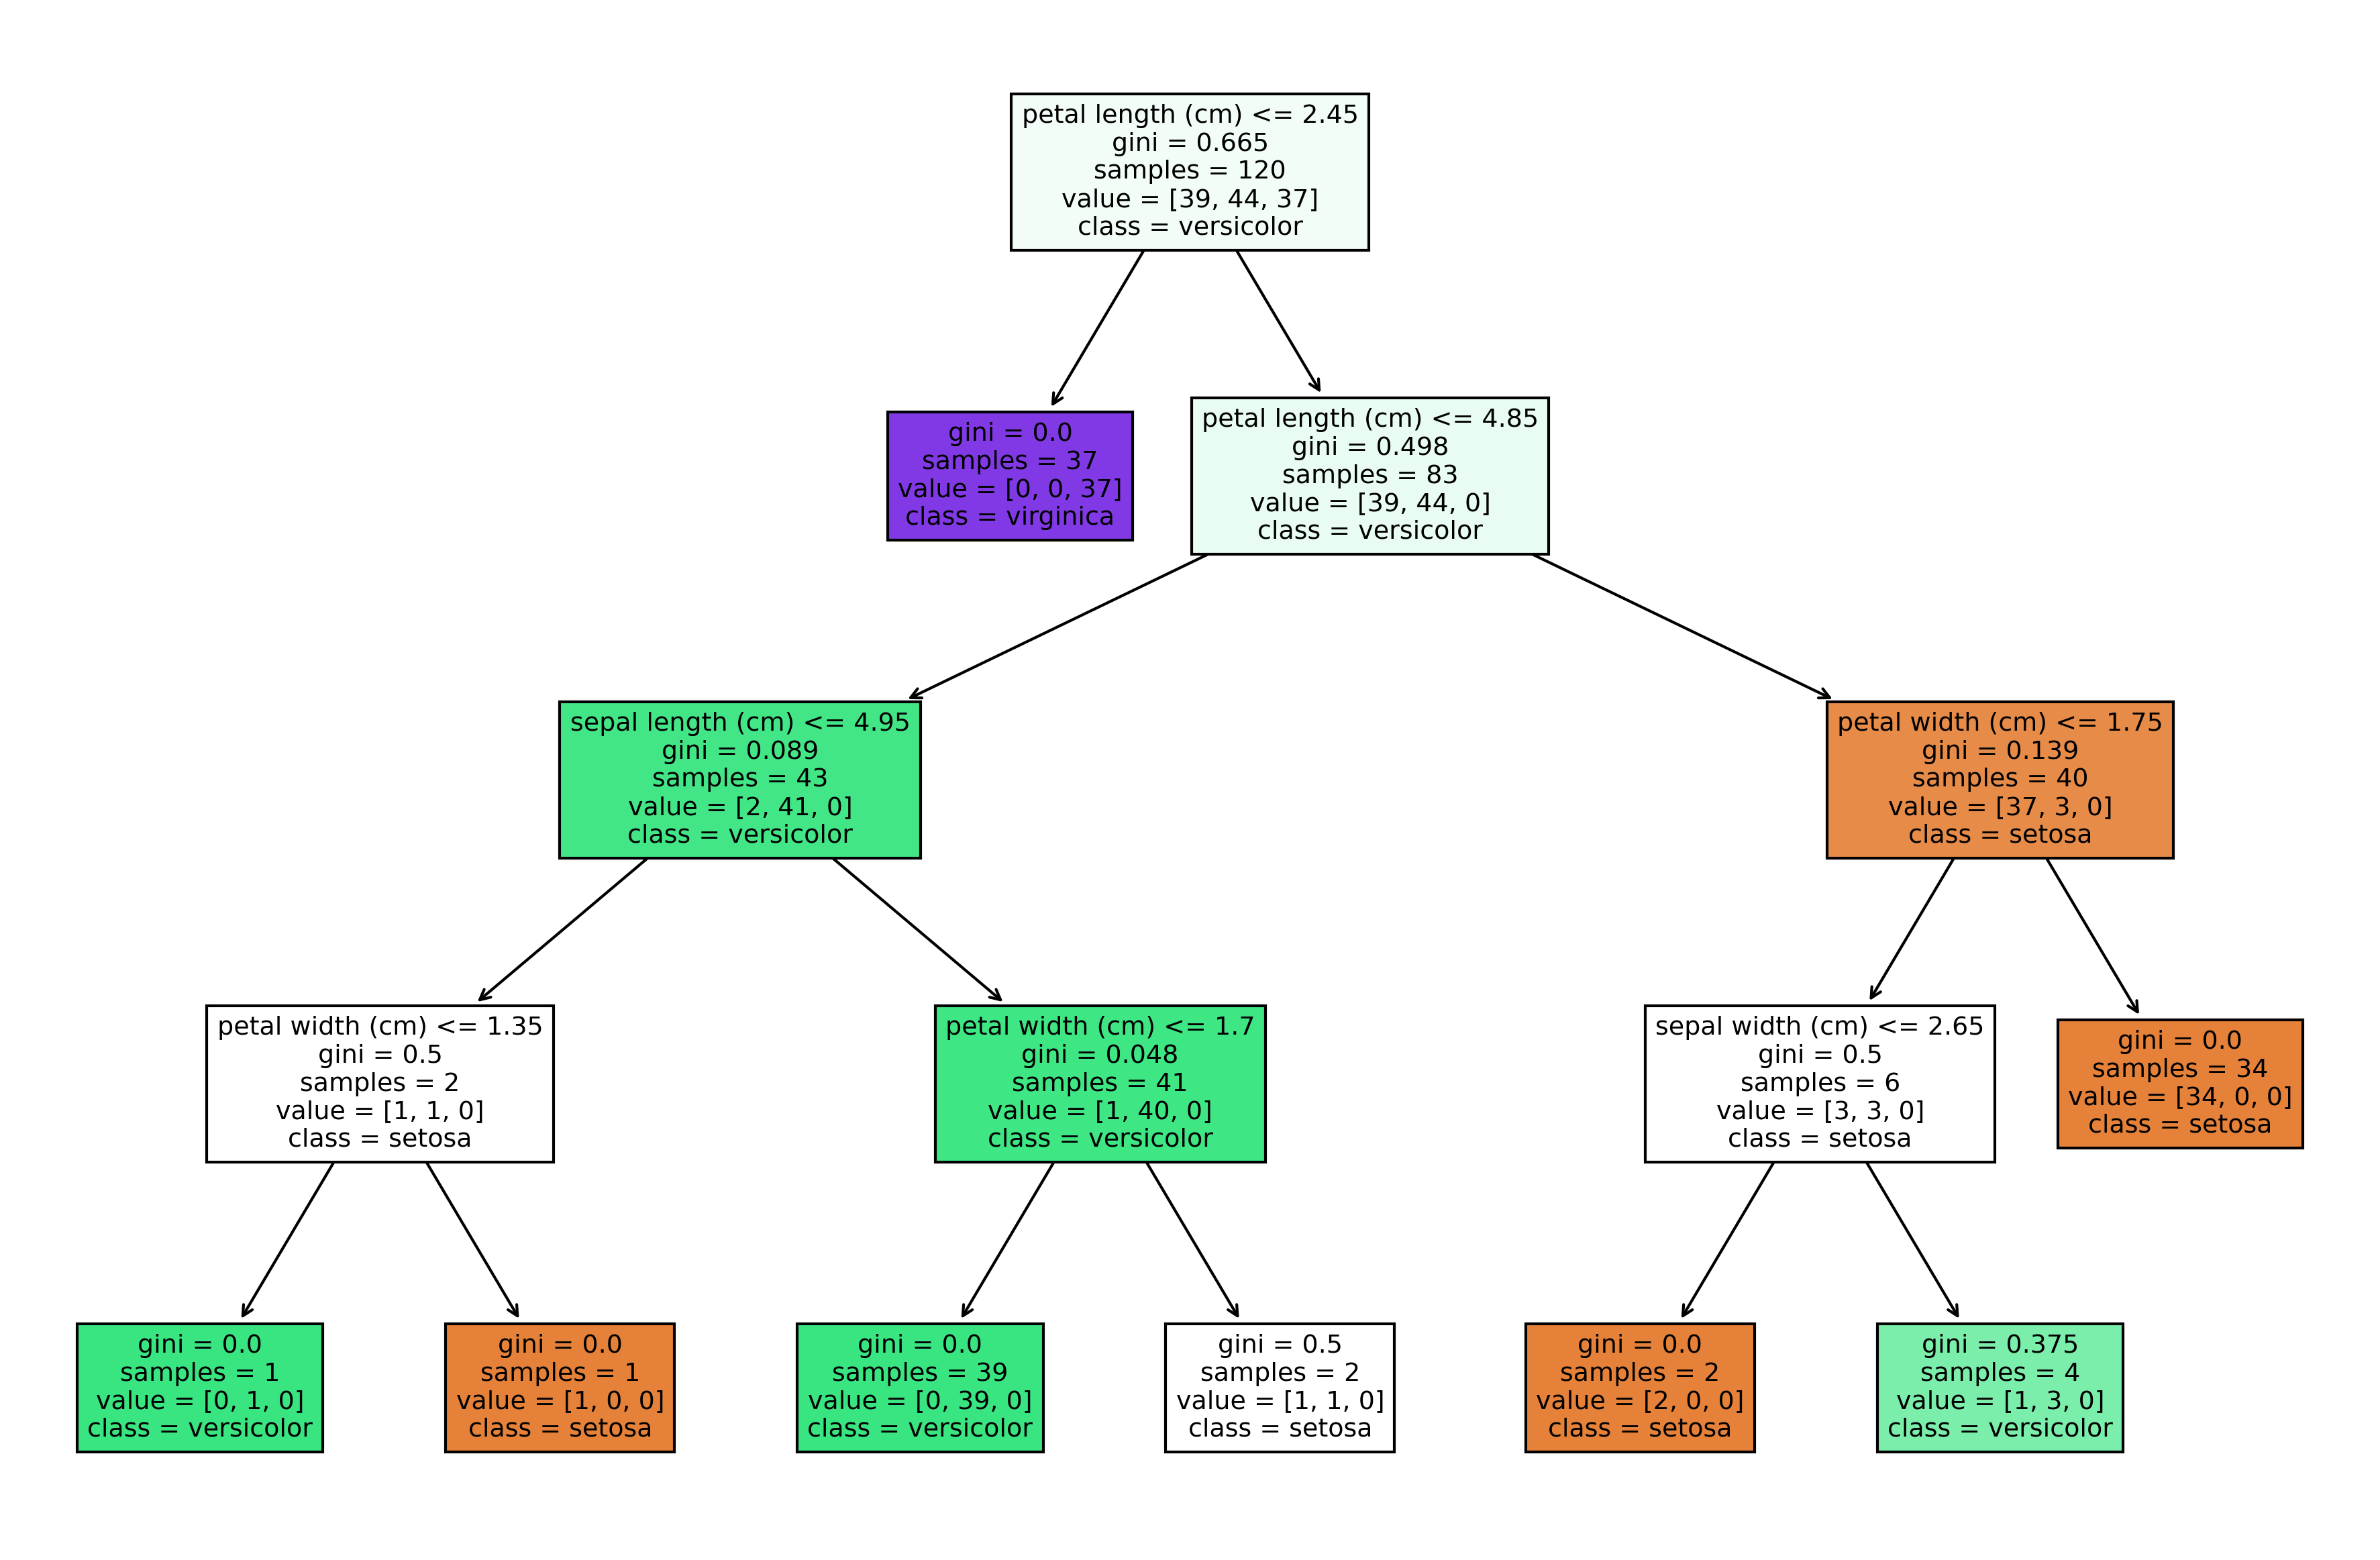

In [24]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')